# Evaluate classification results per cancer type, Figure2

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
import sys,os
from collections import defaultdict, Counter
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler

In [2]:
print(sys.version)

3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:33:30) 
[Clang 9.0.1 ]


In [3]:
%pip list | grep -e "numpy" -e "pandas" -e "matplotlib" -e "scipy" -e "seaborn"

matplotlib            3.3.2
matplotlib-inline     0.1.3
numpy                 1.19.5
pandas                1.2.3
scipy                 1.7.3
seaborn               0.11.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [5]:
store="../results/"

In [6]:
# import data
df=pd.read_csv("../data/TCGA_integrated_data_after_clustering.tsv"
               ,sep="\t",index_col=0)

In [7]:
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']
dict_cluster_colors={"SMK":'red', "UVL":'blue', "APB":'green', "POL":'brown', "MRD":'purple',\
                     "HRD":'hotpink',"GNS":"c","AGE":"y",np.nan:"grey","UND":"grey"}
cluster_orders=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE"]
dict_cluster_order_number={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8}

cluster_colors2=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y',"grey"]
cluster_orders2=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE","UND"]
dict_cluster_order_number2={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8,"UND":8}

In [8]:
bwr=LinearSegmentedColormap.from_list('bwr', [(0,"blue"),(0.5,"w"),(1,"red")] )
wk=LinearSegmentedColormap.from_list('wk', [(0,"w"),(1,"k")] )
wr=LinearSegmentedColormap.from_list('wr', [(0,"w"),(1,"red")] )

# Compare subtype ratio per cancer type

In [9]:
tcga_count=pd.crosstab(df["cluster_m2_names"],df["CancerType"])
tcga_count=tcga_count.reindex(cluster_orders,axis=0).fillna(0)
tcga_ratio=tcga_count.apply(lambda x: x/np.sum(x) )*100
tcga_ratio

CancerType,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM
cluster_m2_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25


In [10]:
# make cancer colors
rgbs1=sns.color_palette("tab20", 20)
rgbs2=sns.color_palette("tab20b", 20)
rgbs1_3=[] 
for i,x in enumerate(rgbs1):
    if (i%4)!=0:
        rgbs1_3.append(x)
rgbs2_3=[] 
for i,x in enumerate(rgbs2):
    if (i%4)!=0:
        rgbs2_3.append(x)

cancer30_colors = sns.color_palette(rgbs1_3+rgbs2_3, 30)

In [11]:
cancers_freq_order=[x[0] for x in Counter( df["CancerType"]).most_common()]

In [12]:
dict_cancer_colors={ cancer:color for cancer,color in zip(cancers_freq_order,cancer30_colors)}
dict_cancer_colors["Others"]="whitesmoke"
dict_cancer_colors[""]="whitesmoke"

In [13]:
dict_cancer_colors

{'BRCA': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CRC': (1.0, 0.4980392156862745, 0.054901960784313725),
 'UCEC': (1.0, 0.7333333333333333, 0.47058823529411764),
 'LUAD': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'HNSC': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'LGG': (1.0, 0.596078431372549, 0.5882352941176471),
 'PRAD': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'LUSC': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'THCA': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'SKCM': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 'STAD': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'OV': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'BLCA': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'GBM': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'LIHC': (0.6196078431372549, 0.8549019607843137, 0.

In [14]:
nbdc=pd.read_csv("../data/NBDC_tgs.tsv",sep="\t",index_col=0)
nbdc.head()

,KNN,SVC,RF,LR,TGS,Details,irGS,CancerType
UCEC12,APB,APB,APB,APB,APB,APB:4,1,UCEC
UCEC05,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC10,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC13,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC26,POL,POL,POL,POL,POL,POL:4,1,UCEC


In [15]:
Counter(nbdc["CancerType"])

Counter({'UCEC': 69,
         'BRCA': 64,
         'CRC': 83,
         'HSOC': 62,
         'LUAD': 43,
         'STAD': 56,
         'TNBC': 36})

In [16]:
nbdc_count=pd.crosstab( nbdc["TGS"], nbdc["CancerType"])
nbdc_count.drop("UND",inplace=True)
nbdc_count=nbdc_count.reindex(cluster_orders,axis=0).fillna(0)
nbdc_count=nbdc_count.drop(["TNBC","STAD"],axis=1)
nbdc_count.rename(columns={"HSOC":"OV"},inplace=True)
nbdc_ratio=nbdc_count.apply(lambda x: x/np.sum(x) )*100
nbdc_ratio

CancerType,BRCA,CRC,OV,LUAD,UCEC
TGS,,,,,
SMK,0.000000,0.000000,0.000000,41.463415,0.000000
UVL,0.000000,0.000000,0.000000,0.000000,0.000000
APB,19.354839,0.000000,1.639344,9.756098,1.470588
POL,0.000000,1.219512,0.000000,0.000000,16.176471
MRD,0.000000,2.439024,0.000000,0.000000,22.058824
HRD,29.032258,18.292683,90.163934,19.512195,4.411765
GNS,3.225806,0.000000,1.639344,9.756098,1.470588
AGE,48.387097,78.048780,6.557377,19.512195,54.411765


In [17]:
total_ratio=tcga_ratio.copy()

add=nbdc_ratio.copy()
add.columns=[x+"_NBDC" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,1.470588
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,54.411765


In [18]:
cptac=pd.read_csv("../data/CPTAC_integrated.tsv",sep="\t")

In [19]:
Counter(cptac["CancerType2"])

Counter({'PAAD': 132,
         'KRC': 109,
         'HNC': 108,
         'UCEC': 100,
         'LUAD': 109,
         'LUSC': 108,
         'BRN': 99,
         'CRC': 105,
         'BRCA': 126,
         'HSOC': 95})

In [20]:
cptac_count=pd.crosstab(cptac["TGS"],cptac["CancerType2"])
cptac_count=cptac_count.reindex(cluster_orders,axis=0).fillna(0)
cptac_count.rename(columns={"HSOC":"OV"},inplace=True)
cptac_ratio=cptac_count.apply(lambda x: x/np.sum(x) )*100
cptac_ratio

CancerType2,BRCA,BRN,CRC,HNC,OV,KRC,LUAD,LUSC,PAAD,UCEC
TGS,,,,,,,,,,
SMK,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [21]:
add=cptac_ratio.copy()
add.columns=[x+"_CPTAC" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,1.470588,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,54.411765,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [22]:
keynotes=pd.read_csv("../data/KEYNOTEs_all_tgs.tsv",sep="\t")

In [23]:
keynotes_s=pd.read_csv("../data/KEYNOTEs_HNSC_SKCM_tgs.tsv",sep="\t")

In [24]:
keynotes_count=pd.crosstab(keynotes_s["TGS"],keynotes_s["CancerType"])
keynotes_count=keynotes_count.reindex(cluster_orders,axis=0).fillna(0)
keynotes_ratio=keynotes_count.apply(lambda x: x/np.sum(x) )*100
keynotes_ratio

CancerType,HNSC,SKCM
TGS,,
SMK,13.0,0.000000
UVL,2.0,83.720930
APB,35.0,0.000000
POL,0.0,0.000000
MRD,0.0,0.000000
HRD,14.0,11.627907
GNS,0.0,0.000000
AGE,36.0,4.651163


In [25]:
add=keynotes_ratio.copy()
add.columns=[x+"_KEYNOTE" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041,14.0,11.627907
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,1.470588,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816,0.0,0.000000
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,54.411765,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449,36.0,4.651163


In [26]:
pcawg=pd.read_csv("../data/PCAWG_data_integrated.txt",sep="\t",index_col=0)
pcawg

,donor_sex,donor_vital_status,donor_diagnosis_icd10,first_therapy_type,first_therapy_response,donor_age_at_diagnosis,donor_survival_time,donor_interval_of_last_followup,tobacco_smoking_history_indicator,tobacco_smoking_intensity,alcohol_history,alcohol_history_intensity,organ_system,histology_abbreviation,histology_tier1,histology_tier2,histology_tier3,histology_tier4,tumour_histological_code,tumour_histological_type,tumour_stage,tumour_grade,percentage_cellularity,level_of_cellularity,dcc_project_code,KNN,SVC,RF,LR,TGS,Details,irGS_count,irGS,CD8A,GZMB,IFNG,CXCL9,CXCL13,APOBEC3A,APOBEC3B,Missense_Mutation,TMB_log10,Indel_count,Indel_count_log10,CD8A_z,GZMB_z,IFNG_z,CXCL9_z,CXCL13_z,APOBEC3A_z,APOBEC3B_z,CYT_score,GEP_score,CYT_score_z,GEP_score_z,CancerType,Age_z,TMB_log10_z,Indel_count_log10_z,sBRCA1_LOH,sBRCA2_LOH,sMLH1,sMSH2,sMSH6,sPMS2,sPOLE,sBRCA12_LOH,sMMR_mut,Sex_Female,Death
DO1000,female,alive,NaN,other therapy,NaN,61.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,BREAST,Breast-DCIS,ECTODERM,Breast,In situ adenocarcinoma,Duct micropapillary carcinoma,8507/3,Duct micropapillary carcinoma,NaN,G2,NaN,NaN,BRCA-UK,AGE,AGE,AGE,AGE,AGE,AGE:4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.204120,1.0,0.301030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRCA,-0.010560,-1.061726,-1.230780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
DO1001,female,NaN,NaN,other therapy,NaN,41.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,BREAST,Breast-AdenoCA,ECTODERM,Breast,Adenocarcinoma,Infiltrating duct carcinoma,8500/3,"Infiltrating duct carcinoma, NOS",NaN,NaN,NaN,NaN,BRCA-UK,HRD,HRD,HRD,HRD,HRD,HRD:4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,1.672098,1.0,0.301030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRCA,-1.549128,-0.040202,-1.230780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
DO1002,female,alive,NaN,other therapy,unknown,39.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,BREAST,Breast-AdenoCA,ECTODERM,Breast,Adenocarcinoma,Infiltrating duct carcinoma,8500/3,"Infiltrating duct carcinoma, NOS",NaN,G2,NaN,NaN,BRCA-UK,GNS,HRD,HRD,HRD,HRD,"HRD:3,GNS:1",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,1.568202,4.0,0.698970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRCA,-1.702985,-0.266991,0.071445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
DO1003,female,alive,C50.4,chemotherapy,unknown,34.0,NaN,NaN,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,BREAST,Breast-AdenoCA,ECTODERM,Breast,Adenocarcinoma,Infiltrating duct carcinoma,8500/3,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,1-20%,BRCA-UK,HRD,HRD,HRD,HRD,HRD,HRD:4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,1.556303,1.0,0.301030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRCA,-2.087627,-0.292966,-1.230780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
DO1004,female,deceased,NaN,other therapy,NaN,59.0,NaN,0.0,Smoking history not documented,NaN,Don't know/Not sure,Not Documented,BREAST,Breast-AdenoCA,ECTODERM,Breast,Adenocarcinoma,Infiltrating duct carcinoma,8500/3,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,NaN,BRCA-UK,HRD,HRD,HRD,HRD,HRD,HRD:4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,1.832509,7.0,0.903090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRCA,-0.164416,0.309951,0.739410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,male,alive,C18.0,NaN,NaN,65.0,NaN,0.0,NaN,NaN,NaN,NaN,"LARGE INTESTINE, (EXCL. APPENDIX)",ColoRect-AdenoCA,ENDODERM,Colon/Rectum,Adenocarcinoma,Adenocarcinoma,8140/3,"Adenocarcinoma, NOS",NaN,NaN,60.0,80-60,COAD-US,AGE,AGE,AGE,AGE,AGE,AGE:4,0,0,0.6812,2.4208,-1.7090,1.4246,-0.5656,-1.1701,1.8499,124.0,2.096910,4.0,0.698970,0.020445,0.798861,0.589183,-0.411896,-0.213440,0.149471,0.103068,1.541759,36.351,-0.500903,-0.199394,CRC,0.29715

In [27]:
pcawg_count=pd.crosstab(pcawg["TGS"],pcawg["CancerType"])
pcawg_count=pcawg_count.reindex(cluster_orders,axis=0).fillna(0)
pcawg_ratio=pcawg_count.apply(lambda x: x/np.sum(x) )*100
pcawg_ratio

CancerType,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,LGG,LIHC,LUAD,LUSC,OV,PAAD,PRAD,SKCM,STAD,THCA,UCEC
TGS,,,,,,,,,,,,,,,,,,,,,
SMK,0.000000,0.000000,0.0,0.000000,1.923077,0.000000,0.0,5.769231,0.0,0.000000,0.0,4.240283,48.484848,60.0,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
UVL,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,74.038462,0.000000,0.000000,0.000000
APB,68.421053,9.278351,50.0,3.225806,0.000000,2.061856,0.0,32.692308,0.0,0.000000,0.0,0.000000,6.060606,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,9.090909
POL,0.000000,0.000000,0.0,0.000000,13.461538,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.272727
MRD,0.000000,0.000000,0.0,3.225806,5.769231,0.000000,0.0,0.000000,0.0,0.740741,0.0,0.706714,0.000000,0.0,0.925926,0.000000,0.000000,0.000000,4.838710,0.000000,9.090909
HRD,10.526316,35.051546,0.0,12.903226,7.692308,10.309278,0.0,9.615385,5.0,68.148148,0.0,22.614841,15.151515,27.5,72.222222,10.480349,7.329843,14.423077,9.677419,2.380952,20.454545
GNS,0.000000,5.670103,5.0,22.580645,0.000000,1.030928,0.0,9.615385,40.0,14.814815,20.0,23.321555,6.060606,0.0,2.777778,1.746725,20.942408,0.961538,6.451613,45.238095,0.000000
AGE,21.052632,50.000000,45.0,58.064516,71.153846,86.597938,100.0,42.307692,55.0,16.296296,80.0,49.116608,24.242424,2.5,23.148148,87.772926,71.727749,10.576923,79.032258,50.000000,59.090909


In [28]:
add=pcawg_ratio.copy()
add.columns=[x+"_pcawg" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,BLCA_pcawg,BRCA_pcawg,CESC_pcawg,CHOL_pcawg,CRC_pcawg,ESCA_pcawg,GBM_pcawg,HNSC_pcawg,KICH_pcawg,KIRC_pcawg,LGG_pcawg,LIHC_pcawg,LUAD_pcawg,LUSC_pcawg,OV_pcawg,PAAD_pcawg,PRAD_pcawg,SKCM_pcawg,STAD_pcawg,THCA_pcawg,UCEC_pcawg
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,0.000000,0.000000,0.0,0.000000,1.923077,0.000000,0.0,5.769231,0.0,0.000000,0.0,4.240283,48.484848,60.0,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,74.038462,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,68.421053,9.278351,50.0,3.225806,0.000000,2.061856,0.0,32.692308,0.0,0.000000,0.0,0.000000,6.060606,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,9.090909
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.0,0.000000,13.461538,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.272727
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000,0.000000,0.000000,0.0,3.225806,5.769231,0.000000,0.0,0.000000,0.0,0.740741,0.0,0.706714,0.000000,0.0,0.925926,0.000000,0.000000,0.000000,4.838710,0.000000,9.090909
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041,14.0,11.627907,10.526316,35.051546,0.0,12.903226,7.692308,10.309278,0.0,9.615385,5.0,68.148148,0.0,22.614841,15.151515,27.5,72.222222,10.480349,7.329843,14.423077,9.6774

In [29]:
import glob
files=glob.glob("../data/tgs_results/*tgs.tsv")
files=sorted(files)
names=[os.path.basename(x).replace("_tgs.tsv","") for x in files]
names

['blca_bgi_primary',
 'blca_cornell_2016_primary',
 'blca_dfarber_mskcc_2014',
 'brca_broad',
 'brca_sanger',
 'ccrcc_dfci_2019',
 'coadread_dfci_2016',
 'coadread_genentech',
 'difg_glass_2019_primary',
 'hnsc_broad',
 'lgg_ucsf_2014',
 'luad_broad',
 'luad_mskcc_2015',
 'mel_dfci_2019',
 'mel_ucla_2016',
 'mixed_allen_2018_lung',
 'mixed_allen_2018_mel',
 'nsclc_mskcc_2018',
 'paad_icgc',
 'paad_utsw_2015',
 'prad_broad',
 'prad_p1000_primary_nonred',
 'skcm_dfci_2015',
 'utuc_cornell_baylor_mdacc_2019',
 'utuc_igbmc_2021']

In [30]:
all_ratio, all_count=pd.DataFrame(), pd.DataFrame()
for path,name in zip(files,names):
    tmp_df=pd.read_csv(path,sep="\t")
    print(name,len(tmp_df))
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    tmp_df=tmp_df[tmp_df["TGS"]!="UND"]
    count=tmp_df.groupby("TGS").count()[[name]].reindex(index=cluster_orders).fillna(0)
    ratio=count/np.sum(count)*100
    all_ratio=pd.concat( [all_ratio,ratio],axis=1)
    all_count=pd.concat( [all_count,count],axis=1)

blca_bgi_primary 86
blca_cornell_2016_primary 42
blca_dfarber_mskcc_2014 50
brca_broad 103
brca_sanger 100
ccrcc_dfci_2019 35
coadread_dfci_2016 619
coadread_genentech 72
difg_glass_2019_primary 162
hnsc_broad 74
lgg_ucsf_2014 61
luad_broad 158
luad_mskcc_2015 34
mel_dfci_2019 144
mel_ucla_2016 37
mixed_allen_2018_lung 57
mixed_allen_2018_mel 151
nsclc_mskcc_2018 75
paad_icgc 99
paad_utsw_2015 109
prad_broad 112
prad_p1000_primary_nonred 117
skcm_dfci_2015 110
utuc_cornell_baylor_mdacc_2019 37
utuc_igbmc_2021 30


In [31]:
add=all_ratio.copy()
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,BLCA_pcawg,BRCA_pcawg,CESC_pcawg,CHOL_pcawg,CRC_pcawg,ESCA_pcawg,GBM_pcawg,HNSC_pcawg,KICH_pcawg,KIRC_pcawg,LGG_pcawg,LIHC_pcawg,LUAD_pcawg,LUSC_pcawg,OV_pcawg,PAAD_pcawg,PRAD_pcawg,SKCM_pcawg,STAD_pcawg,THCA_pcawg,UCEC_pcawg,blca_bgi_primary,blca_cornell_2016_primary,blca_dfarber_mskcc_2014,brca_broad,brca_sanger,ccrcc_dfci_2019,coadread_dfci_2016,coadread_genentech,difg_glass_2019_primary,hnsc_broad,lgg_ucsf_2014,luad_broad,luad_mskcc_2015,mel_dfci_2019,mel_ucla_2016,mixed_allen_2018_lung,mixed_allen_2018_mel,nsclc_mskcc_2018,paad_icgc,paad_utsw_2015,prad_broad,prad_p1000_primary_nonred,skcm_dfci_2015,utuc_cornell_baylor_mdacc_2019,utuc_igbmc_2021
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,0.000000,0.000000,0.0,0.000000,1.923077,0.000000,0.0,5.769231,0.0,0.000000,0.0,4.240283,48.484848,60.0,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.846154,5.128205,2.040816,0.000000,0.0,0.000000,0.324675,0.000000,1.324503,11.111111,0.000000,64.516129,58.064516,0.000000,0.000000,49.056604,0.689655,58.666667,0.000000,0.000000,0.000000,0.000000,0.925926,0.000000,3.448276
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,74.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.784173,89.189189,0.000000,77.241379,1.333333,0.000000,0.000000,0.000000,0.000000,63.888889,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,68.421053,9.278351,50.0,3.225806,0.000000,2.061856,0.0,32.692308,0.0,0.000000,0.0,0.000000,6.060606,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,9.090909,46.153846,66.666667,85.714286,9.183673,13.0,0.000000,0.162338,1.388889,1.986755,22.222222,0.000000,2.580645,3.225806,0.000000,0.000000,20.754717,0.000000,5.333333,0.000000,0.000000,0.000000,0.000000,0.000000,55.882353,41.379310
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.0,0.000000,13.461538,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.272727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.9

## Plot

In [32]:
cancertype="LUNG"
dfs=[ tcga_count[["LUSC","LUAD"]],
     cptac_count[["LUSC","LUAD"]],
     nbdc_count["LUAD"],pcawg_count[["LUSC","LUAD"]],
     all_count[['luad_broad',"nsclc_mskcc_2018",
                   'mixed_allen_2018_lung',"luad_mskcc_2015"]]]
names=["TCGA LUSC","TCGA LUAD","CPTAC LUSC","CPTAC LUAD","NBDC LUAD","PCAWG LUSC","PCAWG LUAD",
       'luad_broad',"nsclc_mskcc_2018", 'mixed_allen_2018_lung',"luad_mskcc_2015"]

TCGA LUSC [n=492]
TCGA LUAD [n=515]
CPTAC LUSC [n=102]
CPTAC LUAD [n=105]
NBDC LUAD [n=41]
PCAWG LUSC [n=40]
PCAWG LUAD [n=33]
luad_broad [n=155]
nsclc_mskcc_2018 [n=75]
mixed_allen_2018_lung [n=53]
luad_mskcc_2015 [n=31]


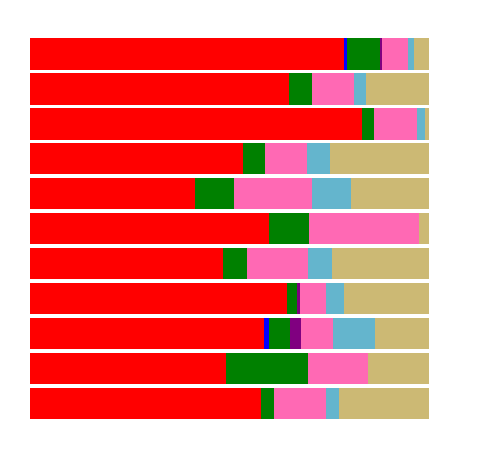

In [33]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()
#plt.savefig(store+"Subtype_frequency_comp_"+cancertype+".png",dpi=300,bbox_inches="tight")

In [34]:
cancertype="SKCM"
dfs=[ tcga_count[cancertype], 
         pcawg_count[cancertype],
     keynotes_count[cancertype],
     all_count["mixed_allen_2018_mel"],
     all_count["mel_dfci_2019"],
    all_count['skcm_dfci_2015'],
     all_count['mel_ucla_2016'],]

names=["TCGA","PCAWG","KEYNOTE",
       'mixed_allen_2018_mel',"mel_dfci_2019",'skcm_dfci_2015','mel_ucla_2016',]

TCGA [n=467]
PCAWG [n=104]
KEYNOTE [n=86]
mixed_allen_2018_mel [n=145]
mel_dfci_2019 [n=139]
skcm_dfci_2015 [n=108]
mel_ucla_2016 [n=37]


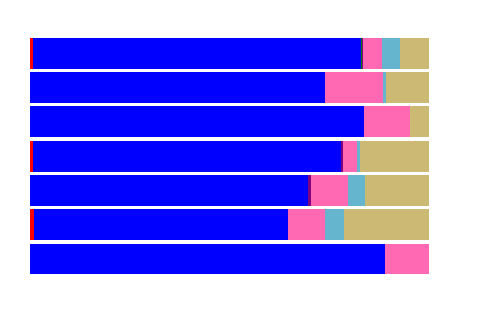

In [35]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=985]
PCAWG [n=194]
CPTAC [n=122]
NBDC [n=62]
brca_sanger [n=100]
brca_broad [n=98]


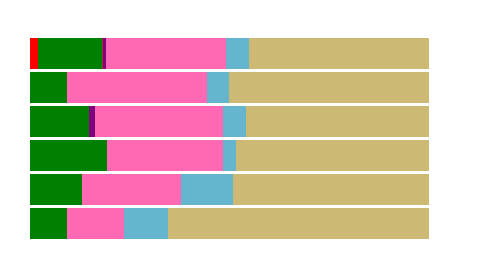

In [36]:
cancertype="BRCA"
dfs=[tcga_count[cancertype],
     pcawg_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[['brca_sanger','brca_broad']] ]
names=["TCGA","PCAWG","CPTAC","NBDC",  'brca_sanger','brca_broad']

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=533]
CPTAC [n=102]
NBDC [n=82]
PCAWG [n=52]
coadread_dfci_2016 [n=616]
coadread_genentech [n=72]


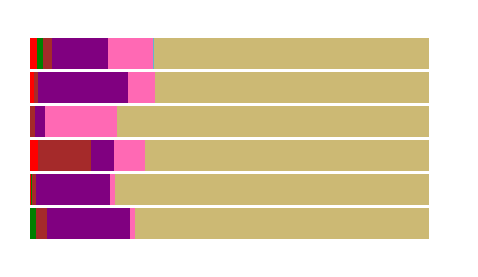

In [37]:
cancertype="CRC"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     pcawg_count[cancertype],
     all_count[["coadread_dfci_2016",'coadread_genentech',]] ]
names=["TCGA","CPTAC","NBDC", "PCAWG",
       "coadread_dfci_2016",'coadread_genentech',]

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

In [38]:
cancertype="BLCA"
dfs=[ tcga_count[cancertype],     all_count[[
         "blca_bgi_primary", 'blca_dfarber_mskcc_2014','blca_cornell_2016_primary',
    "utuc_cornell_baylor_mdacc_2019","utuc_igbmc_2021"]] ] 
names=["TCGA", "blca_bgi", 'blca_dfarber_mskcc_2014','blca_cornell_2016',
       "utuc_cornell_baylor_mdacc_2019","utuc_igbmc_2021"]

TCGA [n=412]
blca_bgi [n=78]
blca_dfarber_mskcc_2014 [n=49]
blca_cornell_2016 [n=39]
utuc_cornell_baylor_mdacc_2019 [n=34]
utuc_igbmc_2021 [n=29]


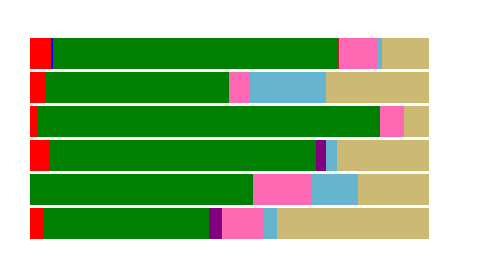

In [39]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

HNSC
TCGA [n=507]
CPTAC [n=98]
KEYNOTE [n=100]
PCAWG [n=52]
hnsc_broad [n=72]


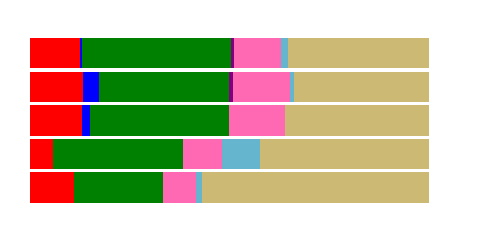

In [40]:
cancertype="HNSC"
dfs=[ tcga_count[cancertype], cptac_count["HNC"],keynotes_count[cancertype],pcawg_count[cancertype],
     all_count['hnsc_broad']]
names=["TCGA","CPTAC", 'KEYNOTE',"PCAWG",'hnsc_broad']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

RCC
TCGA KIRC [n=336]
TCGA KIRP [n=281]
PCAWG KIRC [n=135]
CPTAC KRC [n=100]
ccrcc_dfci_2019 [n=31]


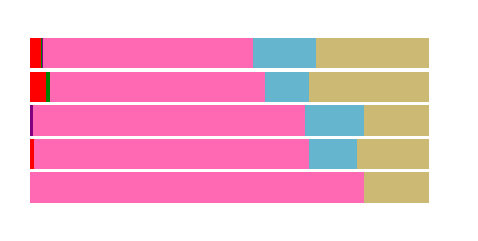

In [41]:
cancertype="RCC"
dfs=[ tcga_count["KIRC"], tcga_count["KIRP"],  pcawg_count[ "KIRC"],cptac_count["KRC"],
     all_count['ccrcc_dfci_2019' ]]
names=["TCGA KIRC","TCGA KIRP", "PCAWG KIRC",    "CPTAC KRC",
       'ccrcc_dfci_2019',]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

PAAD
TCGA [n=177]
PCAWG [n=229]
CPTAC [n=130]
paad_utsw_2015 [n=106]
paad_icgc_2012 [n=97]


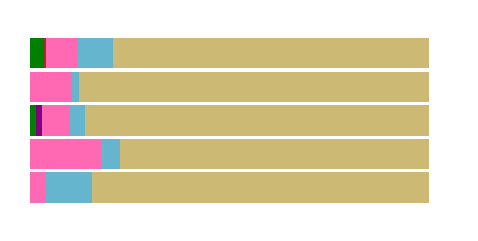

In [42]:
cancertype="PAAD"
dfs=[ tcga_count["PAAD"] ,pcawg_count[cancertype], cptac_count["PAAD"] ,all_count[['paad_utsw_2015','paad_icgc',]]]
names=["TCGA","PCAWG","CPTAC",'paad_utsw_2015',  'paad_icgc_2012', ]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

BRN
TCGA GBM [n=390]
TCGA LGG [n=507]
CPTAC BRN [n=97]
PCAWG GBM [n=38]
lgg_ucsf_2014 [n=56]


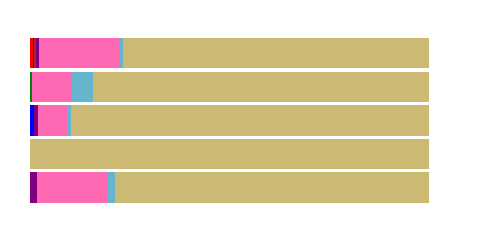

In [43]:
cancertype="BRN"
dfs=[ tcga_count[["GBM","LGG"]], cptac_count["BRN"],pcawg_count["GBM"],all_count[[ 'lgg_ucsf_2014',]]]
names=["TCGA GBM","TCGA LGG",  "CPTAC BRN", "PCAWG GBM",'lgg_ucsf_2014']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

OV
TCGA [n=435]
PCAWG [n=108]
CPTAC [n=93]
NBDC [n=61]


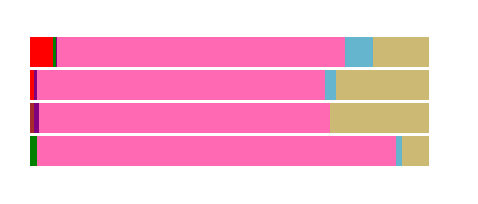

In [44]:
cancertype="OV"
dfs=[ tcga_count[cancertype], pcawg_count[cancertype],cptac_count[cancertype],nbdc_count[cancertype],]
names=["TCGA", "PCAWG","CPTAC","NBDC",]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
print(cancertype)
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=530]
CPTAC [n=98]
NBDC [n=68]
PCAWG [n=44]


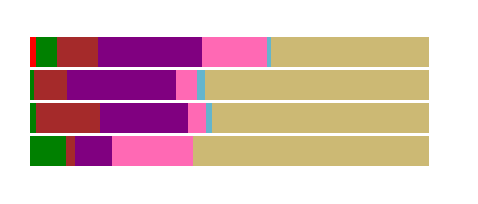

In [45]:
cancertype="UCEC"
dfs=[ tcga_count[cancertype], cptac_count[cancertype],nbdc_count[cancertype],pcawg_count[cancertype]]
names=["TCGA","CPTAC", "NBDC","PCAWG"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=495]
PCAWG [n=191]
prad_p1000_nonred [n=112]
prad_broad [n=110]


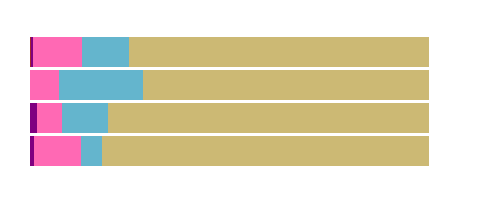

In [46]:
cancertype="PRAD"
dfs=[ tcga_count[cancertype], pcawg_count[cancertype],all_count[['prad_p1000_primary_nonred','prad_broad',]]]
names=["TCGA","PCAWG",'prad_p1000_nonred','prad_broad',]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

# UMAP

In [47]:
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,BLCA_pcawg,BRCA_pcawg,CESC_pcawg,CHOL_pcawg,CRC_pcawg,ESCA_pcawg,GBM_pcawg,HNSC_pcawg,KICH_pcawg,KIRC_pcawg,LGG_pcawg,LIHC_pcawg,LUAD_pcawg,LUSC_pcawg,OV_pcawg,PAAD_pcawg,PRAD_pcawg,SKCM_pcawg,STAD_pcawg,THCA_pcawg,UCEC_pcawg,blca_bgi_primary,blca_cornell_2016_primary,blca_dfarber_mskcc_2014,brca_broad,brca_sanger,ccrcc_dfci_2019,coadread_dfci_2016,coadread_genentech,difg_glass_2019_primary,hnsc_broad,lgg_ucsf_2014,luad_broad,luad_mskcc_2015,mel_dfci_2019,mel_ucla_2016,mixed_allen_2018_lung,mixed_allen_2018_mel,nsclc_mskcc_2018,paad_icgc,paad_utsw_2015,prad_broad,prad_p1000_primary_nonred,skcm_dfci_2015,utuc_cornell_baylor_mdacc_2019,utuc_igbmc_2021
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,0.000000,0.000000,0.0,0.000000,1.923077,0.000000,0.0,5.769231,0.0,0.000000,0.0,4.240283,48.484848,60.0,0.925926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.846154,5.128205,2.040816,0.000000,0.0,0.000000,0.324675,0.000000,1.324503,11.111111,0.000000,64.516129,58.064516,0.000000,0.000000,49.056604,0.689655,58.666667,0.000000,0.000000,0.000000,0.000000,0.925926,0.000000,3.448276
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,74.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.784173,89.189189,0.000000,77.241379,1.333333,0.000000,0.000000,0.000000,0.000000,63.888889,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,68.421053,9.278351,50.0,3.225806,0.000000,2.061856,0.0,32.692308,0.0,0.000000,0.0,0.000000,6.060606,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,9.090909,46.153846,66.666667,85.714286,9.183673,13.0,0.000000,0.162338,1.388889,1.986755,22.222222,0.000000,2.580645,3.225806,0.000000,0.000000,20.754717,0.000000,5.333333,0.000000,0.000000,0.000000,0.000000,0.000000,55.882353,41.379310
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.0,0.000000,13.461538,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.272727,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.9

In [48]:
col_order=total_ratio.columns

In [49]:
dict_cancer_number={
'SKCM':1,
'SKCM_KEYNOTE':1,
'SKCM_pcawg':1,
'mel_ucla_2016':1,
'mixed_allen_2018_mel':1,
'mel_dfci_2019':1,
'skcm_dfci_2015':1,
'blca_dfarber_mskcc_2014':2,
"utuc_igbmc_2021":2,
'blca_cornell_2016_primary':2,
"utuc_cornell_baylor_mdacc_2019":2,
'blca_bgi_primary':2,
'BLCA':2,
'LUSC':3,
'LUSC_CPTAC':3,
'LUSC_pcawg':3,
'LUAD_NBDC':3,
'mixed_allen_2018_lung':3,
'LUAD_CPTAC':3,
 'LUAD_pcawg':3,
'luad_mskcc_2015':3,
'nsclc_mskcc_2018':3,
'LUAD':3,
'luad_broad':3,
'KIRC':4,
'KIRC_pcawg':4,
'KIRP':4,
'ccrcc_dfci_2019':4,
'KRC_CPTAC':4,
'OV_NBDC':10,
'OV_CPTAC':10,
'OV_pcawg':10,
'OV':10,
'UCEC_NBDC':11,
'UCEC_CPTAC':11,
'UCEC_pcawg':11,
'UCEC':11,
'coadread_dfci_2016':7,
'coadread_genentech':7,
'CRC_CPTAC':7,
'CRC_pcawg':7,
'CRC':7,
'CRC_NBDC':7,
'GBM':5,
'BRN_CPTAC':5,
'LGG':5,
'lgg_ucsf_2014':5,
'PAAD':6,
'PAAD_CPTAC':6,
'PAAD_pcawg':6,
'paad_utsw_2015':6,
'paad_icgc':6,
'PRAD':12,
'PRAD_PCAWG':12,
'prad_broad':12,
'prad_p1000_primary_nonred':12,
'HNSC':9,
'HNC_CPTAC':9,
'HNSC_KEYNOTE':9,
'HNSC_pcawg':9,
'hnsc_broad':9,
'hnsc_jhu':9,
'hnsc_mdanderson_2013':9,
'brca_broad':8,
'brca_sanger':8,
'BRCA_NBDC':8,
'BRCA':8,
"BRCA_CPTAC":8,
"BRCA_pcawg":8}

In [50]:
df_color_order=pd.DataFrame({"cancer":col_order})
df_color_order["number"]=df_color_order["cancer"].replace(dict_cancer_number)
df_color_order=df_color_order[df_color_order["cancer"].isin(dict_cancer_number)]

In [51]:
dict_number_color={1:"blue",2:"green",3:"red",5:"hotpink",4:"gold",6:"limegreen",7:"purple",
                   8:"c",9:"brown",10:"tab:purple",11:"tab:orange",12:"grey"}

In [52]:
df_color_order["TCGA"]=[1]*15 +[0]*(len(df_color_order)-15)
df_color_order.index=df_color_order["cancer"]
df_color_order["color"]=df_color_order["number"].replace(dict_number_color)
df_color_order

,cancer,number,TCGA,color
cancer,,,,
BLCA,BLCA,2,1,green
BRCA,BRCA,8,1,c
CRC,CRC,7,1,purple
GBM,GBM,5,1,hotpink
HNSC,HNSC,9,1,brown
KIRC,KIRC,4,1,gold
KIRP,KIRP,4,1,gold
LGG,LGG,5,1,hotpink
LUAD,LUAD,3,1,red


In [53]:
fc=[]
for idx in df_color_order.index:
    if df_color_order.loc[idx,"TCGA"]==1:
        fc.append(df_color_order.loc[idx,"color"])
    else:
        fc.append("None")
df_color_order["face_color"]=fc

In [54]:
cbio_frozen_names=["blca_bgi_primary",'brca_broad', 'brca_sanger','luad_broad', 'coadread_genentech',
'hnsc_broad','lgg_ucsf_2014','paad_icgc', 'paad_utsw_2015', 'prad_broad' ,"utuc_igbmc_2021",]

In [55]:
cbio_ffpe_names=['blca_cornell_2016_primary','blca_dfarber_mskcc_2014',
        "ccrcc_dfci_2019", "coadread_dfci_2016","luad_mskcc_2015",
            "mel_dfci_2019",'mel_ucla_2016',
            'mixed_allen_2018_mel','mixed_allen_2018_lung',
            "nsclc_mskcc_2018","skcm_dfci_2015","prad_p1000_primary_nonred","utuc_cornell_baylor_mdacc_2019"]

In [56]:
df_color_order["FFPE"]=(df_color_order["cancer"].isin(cbio_ffpe_names)).astype(int)

In [57]:
markers=[]
for idx in df_color_order.index:
    if df_color_order.loc[idx,"TCGA"]==1:
        markers.append("o")
    elif df_color_order.loc[idx,"FFPE"]==0:
        markers.append("^")
    else:
        markers.append(",")
df_color_order["marker"]=markers

In [58]:
df_color_order

,cancer,number,TCGA,color,face_color,FFPE,marker
cancer,,,,,,,
BLCA,BLCA,2,1,green,green,0,o
BRCA,BRCA,8,1,c,c,0,o
CRC,CRC,7,1,purple,purple,0,o
GBM,GBM,5,1,hotpink,hotpink,0,o
HNSC,HNSC,9,1,brown,brown,0,o
KIRC,KIRC,4,1,gold,gold,0,o
KIRP,KIRP,4,1,gold,gold,0,o
LGG,LGG,5,1,hotpink,hotpink,0,o
LUAD,LUAD,3,1,red,red,0,o


In [59]:
total_ratio_2=total_ratio.loc[:,df_color_order.index]

In [60]:
import umap

data=total_ratio_2.T
# make projecter, default
trans=umap.UMAP(random_state=1,n_components=2
                ,n_neighbors=30
               ,min_dist=0.25
                ,metric='euclidean').fit(data)

In [61]:
flag=df_color_order["marker"]=="o"
df_color_order.loc[flag,"color"]

cancer
BLCA         green
BRCA             c
CRC         purple
GBM        hotpink
HNSC         brown
KIRC          gold
KIRP          gold
LGG        hotpink
LUAD           red
LUSC           red
OV      tab:purple
PAAD     limegreen
PRAD          grey
SKCM          blue
UCEC    tab:orange
Name: color, dtype: object

[]

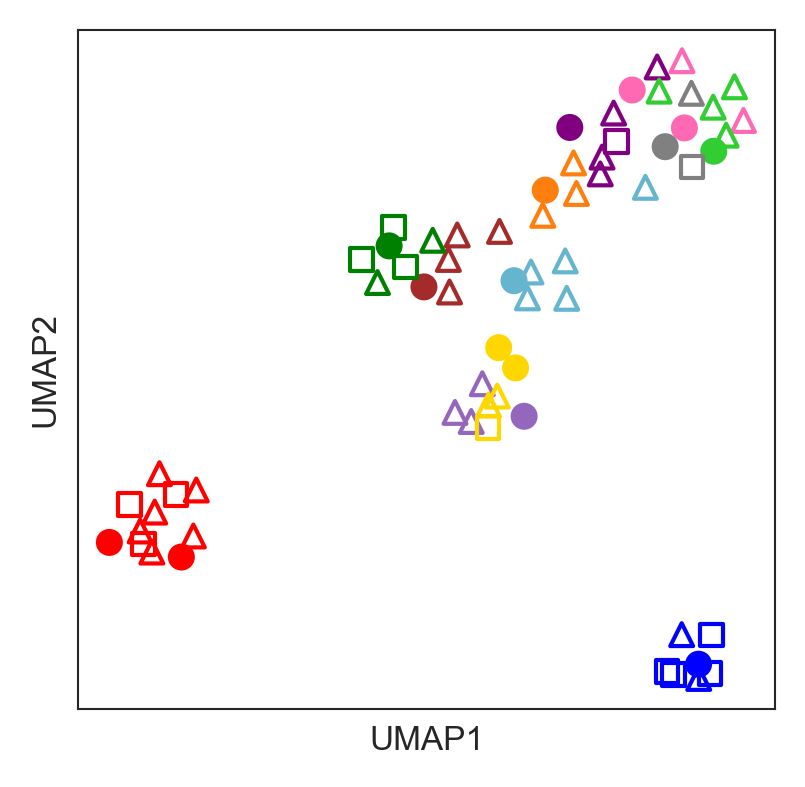

In [62]:
X=trans.transform(data)
# plot
flag=df_color_order["marker"]=="o"
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)    
ax.scatter(X[flag, 0], X[flag, 1],c=df_color_order.loc[flag,"color"],s=30,lw=1)

flag=df_color_order["marker"]=="^"
ax.scatter(X[flag, 0], X[flag, 1],marker="^",ec=df_color_order.loc[flag,"color"],fc="None",s=30,lw=1)

flag=df_color_order["marker"]==","
ax.scatter(X[flag, 0], X[flag, 1],marker=",",ec=df_color_order.loc[flag,"color"],fc="None",s=30,lw=1)

ax.set_xlabel("UMAP1",fontsize=8)
ax.set_ylabel("UMAP2",fontsize=8)
ax.set_xticks([])
ax.set_yticks([])

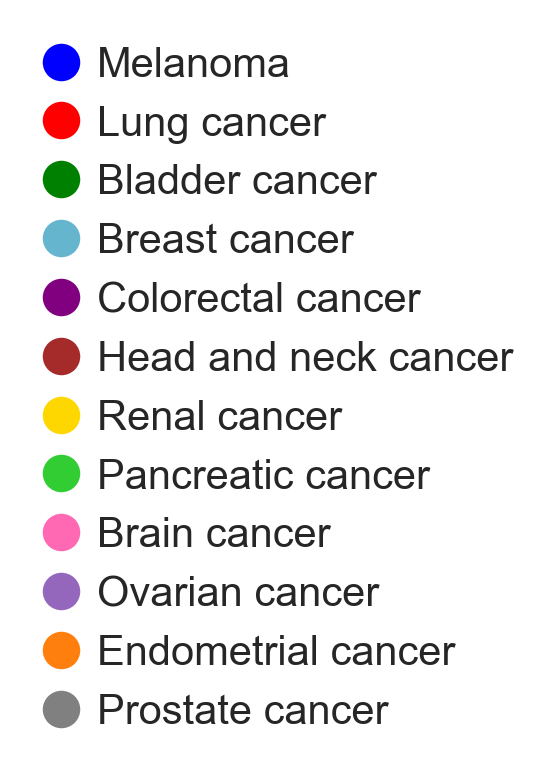

In [63]:
lg_labels=["Melanoma","Lung cancer","Bladder cancer","Breast cancer","Colorectal cancer",
           "Head and neck cancer","Renal cancer","Pancreatic cancer","Brain cancer",
           "Ovarian cancer","Endometrial cancer","Prostate cancer"]
lg_colors=["blue","red","green","c","purple","brown","gold","limegreen","hotpink","tab:purple","tab:orange","grey"]


from matplotlib.lines import Line2D
custom_legends =[ Line2D([0],[0],marker='o',markerfacecolor=lg_colors[i],markersize=10,# markeredgecolor="k",
                        label=lg_labels[i],
                        color="w"
                        ) for i in range(len(lg_labels)) ]


# plot
plt.figure(figsize=(1,1))
plt.legend(handles=custom_legends,loc="center",title="",fontsize=10,
           frameon=False,edgecolor="k", handlelength=0.7
           ,labelspacing=0.5,handletextpad=0.5) # h
plt.gca().set_axis_off()

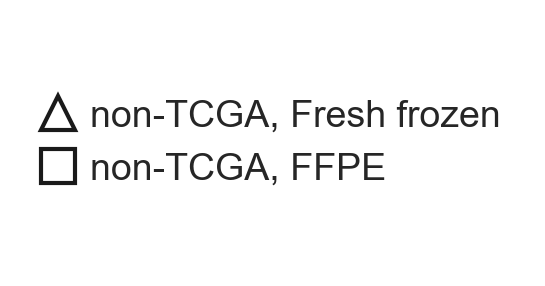

In [64]:
lg_labels=["non-TCGA, Fresh frozen","non-TCGA, FFPE"]
lg_colors=["k","k"]
lg_markers=["^","s"]

from matplotlib.lines import Line2D
custom_legends =[ Line2D([0],[0],marker=lg_markers[i],markerfacecolor="w",markersize=8,
                         markeredgecolor="k",
                        label=lg_labels[i],
                        color="w"
                        ) for i in range(len(lg_labels)) ]


# plot
plt.figure(figsize=(1,1))
plt.legend(handles=custom_legends,loc="center",title="",fontsize=9,
           frameon=False,edgecolor="k", handlelength=0.7
           ,labelspacing=0.5,handletextpad=0.5) # h
plt.gca().set_axis_off()

# Concordance ratio

In [65]:
keynotes["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in keynotes["Details"]]
counter=Counter( keynotes["top_count"]).most_common()
counter

[(4, 261), (3, 38), (2, 12)]

/Users/tshiro/.pyenv/versions/miniforge3-4.10/envs/gsp_env_p376/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


3.858520900321544


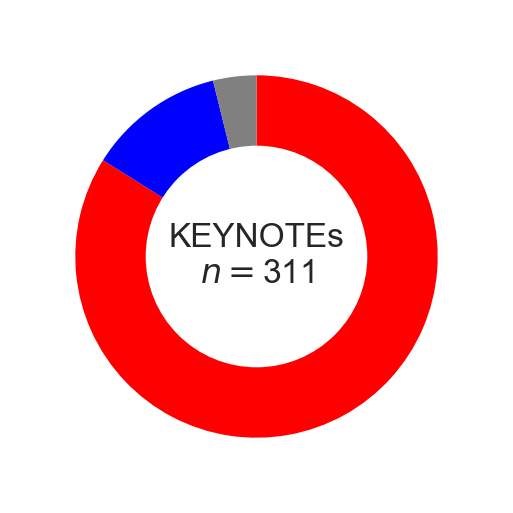

In [66]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3",""]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"KEYNOTEs\n$n=$"+str(len(keynotes)).format(len(keynotes)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

In [67]:
cptac["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in cptac["Details"] ]
counter=Counter( cptac["top_count"]).most_common()
counter

[(4, 953), (3, 94), (2, 44)]

4.032997250229148


/Users/tshiro/.pyenv/versions/miniforge3-4.10/envs/gsp_env_p376/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


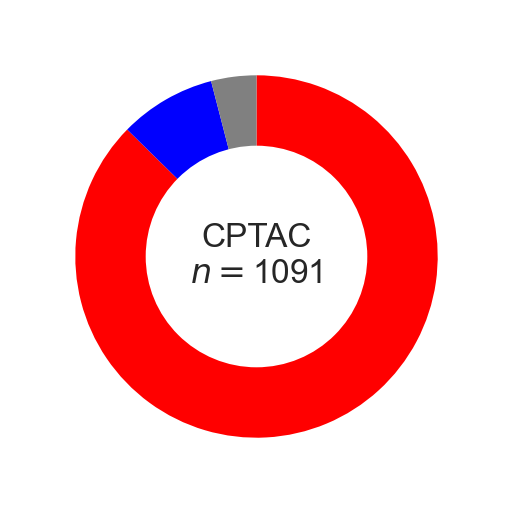

In [68]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"CPTAC\n$n=$"+str(len(cptac)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [69]:
nbdc["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in nbdc["Details"] ]
counter=Counter( nbdc["top_count"]).most_common()
counter

[(4, 335), (3, 68), (2, 10)]

2.4213075060532687


/Users/tshiro/.pyenv/versions/miniforge3-4.10/envs/gsp_env_p376/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


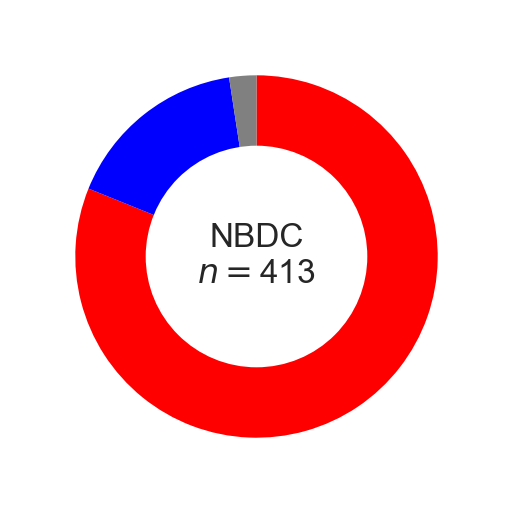

In [70]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"NBDC\n$n=$"+str(len(nbdc)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [71]:
pcawg["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in pcawg["Details"] ]
counter=Counter( pcawg["top_count"]).most_common()
counter

[(4, 1609), (3, 230), (2, 76), (1, 1)]

In [72]:
counter=[(4, 1609), (3, 230), (2, 77)]

4.018789144050104


/Users/tshiro/.pyenv/versions/miniforge3-4.10/envs/gsp_env_p376/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  


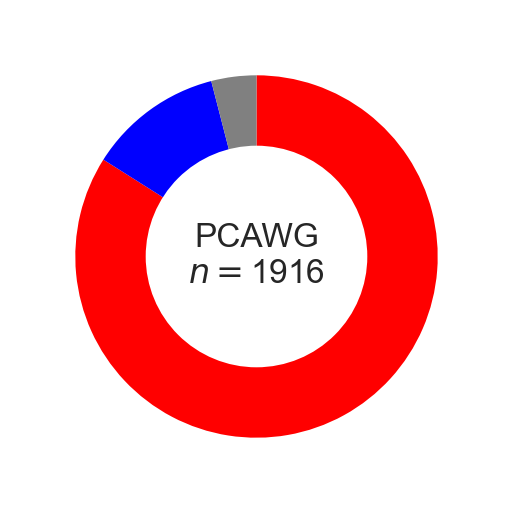

In [73]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"PCAWG\n$n=$"+str(len(pcawg)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [74]:
top_counts=[]
for name in cbio_ffpe_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)

In [75]:
Counter(top_counts)

Counter({4: 1389, 3: 80, 2: 39})

2.586206896551724


/Users/tshiro/.pyenv/versions/miniforge3-4.10/envs/gsp_env_p376/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


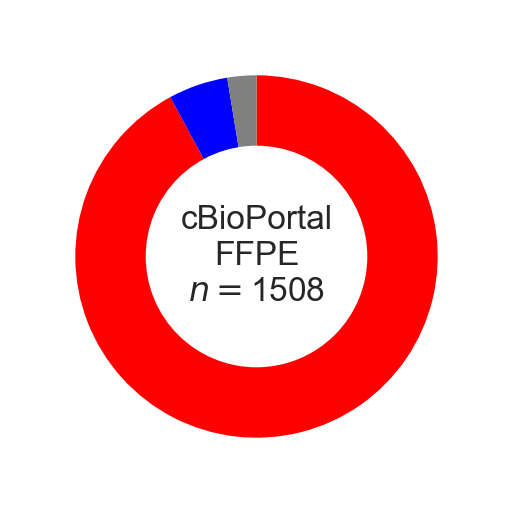

In [76]:
counter=Counter( top_counts).most_common()
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFFPE\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

[(4, 885), (3, 88), (2, 31)]
3.087649402390438


/Users/tshiro/.pyenv/versions/miniforge3-4.10/envs/gsp_env_p376/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.


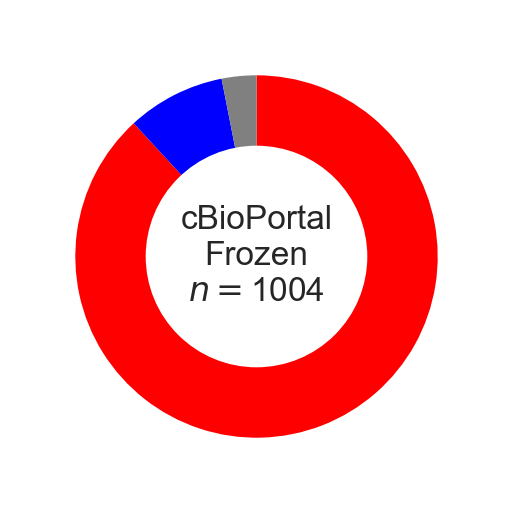

In [77]:
top_counts=[]
for name in cbio_frozen_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)
    
counter=Counter( top_counts).most_common()
print(counter)

# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFrozen\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

# PCAWG analysis

In [78]:
mean_by_cluster=pcawg.groupby("TGS").mean()[[x+"_z" for x in ["Age"]] ].loc[cluster_orders,:].T
mean_by_cluster

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
Age_z,0.197282,-0.457144,-0.214634,-0.077872,0.286897,0.070828,-0.273242,0.039199


In [79]:
mean_by_cluster_raw=pcawg.groupby("TGS").mean()[["donor_age_at_diagnosis"]].loc[cluster_orders,:].T
mean_by_cluster_raw

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
donor_age_at_diagnosis,63.701754,55.194805,58.347222,60.125,64.866667,62.057971,57.585366,61.646821


donor_age_at_diagnosis


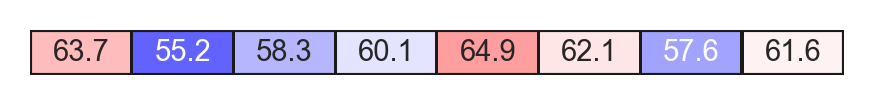

In [80]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(3.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=0.75,vmin=-0.75,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in annot_df.index:
    print(i)

In [81]:
mean_by_cluster=pcawg.groupby("TGS").mean()[[x+"_z" for x in ["TMB_log10","Indel_count_log10"]] ].loc[cluster_orders,:].T
mean_by_cluster

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
TMB_log10_z,1.341072,2.138334,0.901195,3.873219,2.226380,0.200754,-1.040398,-0.256509
Indel_count_log10_z,1.139956,0.237519,-0.028078,1.573546,4.883802,0.263832,-0.498046,-0.255084


In [82]:
mean_by_cluster_raw=pcawg.groupby("TGS").mean()[["TMB_log10","Indel_count_log10"]].loc[cluster_orders,:].T
mean_by_cluster_raw

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
TMB_log10,2.304883,2.670122,2.103368,3.464903,2.710458,1.782484,1.213891,1.573004
Indel_count_log10,1.025491,0.749720,0.668557,1.157989,2.169553,0.757761,0.524942,0.599188


TMB_log10
Indel_count_log10


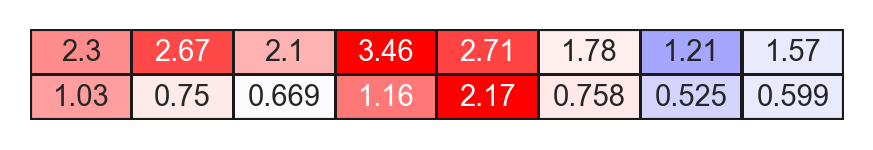

In [83]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(3.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=3,vmin=-3,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in annot_df.index:
    print(i)

In [84]:
selected2=['CD8A', 'GZMB', 'IFNG', 'CXCL9', 'CXCL13',"CYT_score","GEP_score"]

In [85]:
mean_by_cluster=pcawg.groupby("TGS").mean()[[x+"_z" for x in selected2] ].loc[cluster_orders,:].T
mean_by_cluster

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
CD8A_z,0.387554,0.381646,0.280347,0.329667,0.626565,0.060269,0.187532,-0.225619
GZMB_z,0.709236,0.132968,0.564237,0.582720,1.075823,0.056292,-0.159917,-0.229080
IFNG_z,0.412233,0.109951,0.361235,0.587011,0.931808,0.164700,-0.023045,-0.251187
CXCL9_z,0.497401,0.425194,0.457858,0.666220,0.641911,0.058601,-0.002005,-0.226097
CXCL13_z,0.806268,0.290100,0.555328,0.555020,0.881308,0.016485,-0.205831,-0.196808
CYT_score_z,0.227672,0.098558,0.367399,0.123533,0.445654,0.165608,-0.004520,-0.277411
GEP_score_z,0.527742,0.308983,0.413741,0.560687,0.584690,0.129051,0.055813,-0.274835


In [86]:
mean_by_cluster_raw=pcawg.groupby("TGS").mean()[selected2].loc[cluster_orders,:].T
mean_by_cluster_raw

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
CD8A,1.400302,1.388730,1.190302,1.286912,1.868485,0.759209,1.008494,0.199203
GZMB,2.226035,0.973737,1.910936,1.951100,3.022669,0.807113,0.337264,0.186966
IFNG,-2.296541,-3.300230,-2.465873,-1.716212,-0.571354,-3.118444,-3.741827,-4.499345
CXCL9,3.808043,3.618773,3.704392,4.250550,4.186831,2.657864,2.499003,1.911616
CXCL13,2.963273,1.176987,2.094854,2.093787,3.222962,0.230096,-0.539267,-0.508044
CYT_score,2.484889,2.317753,2.665764,2.350082,2.767064,2.404548,2.184320,1.831066
GEP_score,53.417755,48.283200,50.742000,54.191000,54.754385,44.060000,42.341011,34.580303


CD8A
GZMB
IFNG
CXCL9
CXCL13
CYT_score
GEP_score


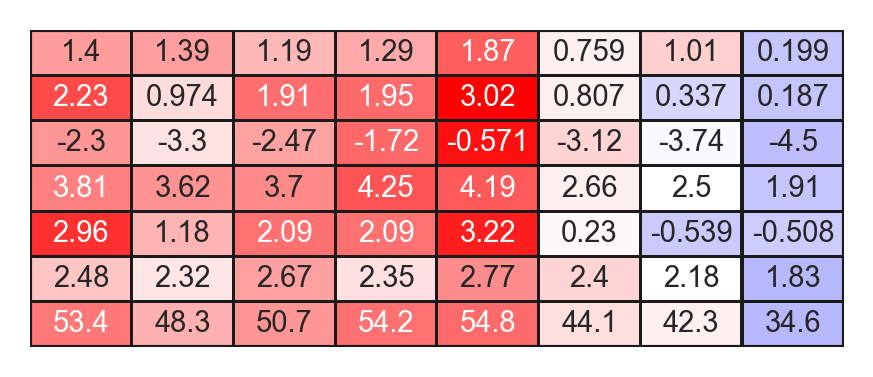

In [87]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(3.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=-1,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in annot_df.index:
    print(i)

In [88]:
selected3=['APOBEC3A',"APOBEC3B"]

In [89]:
mean_by_cluster=pcawg.groupby("TGS").mean()[[x+"_z" for x in selected3] ].loc[cluster_orders,:].T
mean_by_cluster

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
APOBEC3A_z,0.56910,-0.606173,0.971502,-0.167369,0.291875,0.211930,-0.280305,-0.246272
APOBEC3B_z,0.59102,0.094103,0.796481,-0.076492,0.204307,0.065259,-0.516523,-0.140256


In [90]:
mean_by_cluster_raw=pcawg.groupby("TGS").mean()[selected3].loc[cluster_orders,:].T
mean_by_cluster_raw

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
APOBEC3A,-0.211020,-2.897153,0.708685,-1.894250,-0.844631,-1.027346,-2.152368,-2.074585
APOBEC3B,2.833841,1.831823,3.248146,1.487825,2.054046,1.773660,0.600517,1.359247


APOBEC3A
APOBEC3B


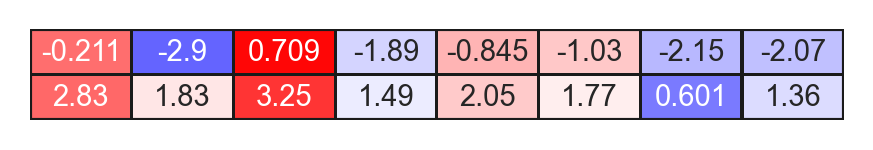

In [91]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(3.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=-1,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in annot_df.index:
    print(i)

In [92]:
category_ratio=pcawg.groupby("TGS").mean()[["Sex_Female","Death"]].T*100
category_ratio=category_ratio.loc[:,cluster_orders]
category_ratio

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
Sex_Female,33.333333,31.168831,56.944444,25.0,80.000000,58.212560,34.634146,42.986882
Death,31.578947,53.246753,23.611111,12.5,33.333333,38.405797,11.219512,35.418769


In [93]:
mm=MinMaxScaler()
category_ratio_a=pd.DataFrame(mm.fit_transform(category_ratio.T)).T
category_ratio_a

,0,1,2,3,4,5,6,7
0,0.151515,0.112161,0.580808,0.000000,1.000000,0.603865,0.175166,0.327034
1,0.484434,1.000000,0.294847,0.030468,0.526178,0.646873,0.000000,0.575799


Sex_Female
Death


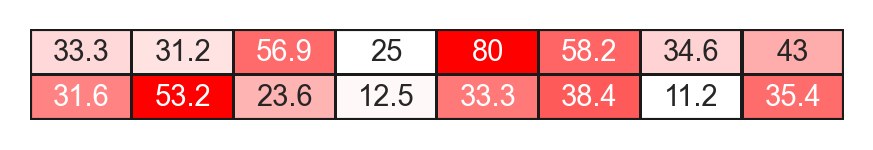

In [94]:
sns_df=category_ratio_a
annot_df=category_ratio
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(3.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=0,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=wr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in annot_df.index:
    print(i)

In [95]:
category_ratio=pcawg.groupby("TGS").mean()[["sPOLE","sMMR_mut","sBRCA12_LOH"]].T*100
category_ratio=category_ratio.loc[:,cluster_orders]
category_ratio

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
sPOLE,0.000000,1.298701,0.0,87.5,0.000000,0.000000,0.0,0.000000
sMMR_mut,0.000000,0.000000,0.0,12.5,26.666667,0.241546,0.0,0.302725
sBRCA12_LOH,1.754386,0.000000,0.0,0.0,0.000000,3.864734,0.0,0.201816


In [96]:
mm=MinMaxScaler()
category_ratio_a=pd.DataFrame(mm.fit_transform(category_ratio.T)).T
category_ratio_a

,0,1,2,3,4,5,6,7
0,0.000000,0.014842,0.0,1.00000,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.46875,1.0,0.009058,0.0,0.011352
2,0.453947,0.000000,0.0,0.00000,0.0,1.000000,0.0,0.052220


sPOLE
sMMR_mut
sBRCA12_LOH


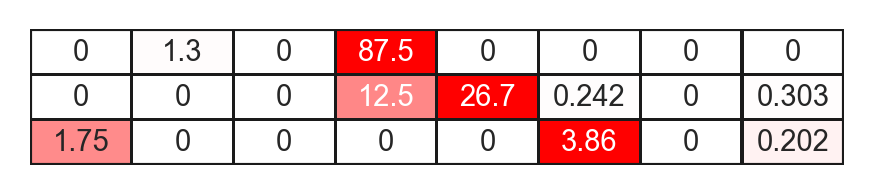

In [97]:
sns_df=category_ratio_a
annot_df=category_ratio
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(3.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=1,vmin=0,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=wr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in annot_df.index:
    print(i)

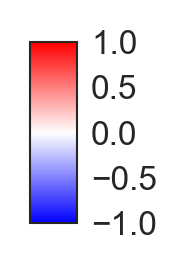

In [98]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=bwr
vmin=-1
vmax=1
bounds=[-1,-0.5,0,0.5,1]
fontsize=8
label=""
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)

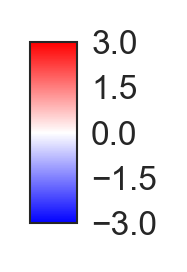

In [99]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=bwr
vmin=-3
vmax=3
bounds=[-3,-1.5,0,1.5,3]
fontsize=8
label=""
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)

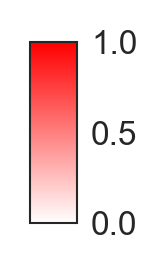

In [100]:
# colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm
from matplotlib.colorbar import ColorbarBase
cmap=wr
vmin=0
vmax=1
bounds=[0,0.5,1]
fontsize=8
label=""
orientation='vertical'
norm = Normalize(vmin=vmin, vmax=vmax)

fig=plt.figure(figsize=(0.2,0.8))
ax=fig.add_subplot(111)
cbar = ColorbarBase(ax, cmap=cmap, norm=norm,
ticks=bounds, orientation=orientation,label=label,)
ax.tick_params(labelsize=fontsize)#,labelleft=True,labelright=False)